In [1]:
import pandas as pd
dfW = pd.read_csv("data_refined.csv")
dfI = pd.read_csv("insurance.csv")

In [2]:
dfI.dropna()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
dfI.drop(["region"], axis=1, inplace=True)

**Encoding categorical data**

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

dfI['sex']= encoder.fit_transform(dfI['sex'])
dfI['smoker']= encoder.fit_transform(dfI['smoker'])

In [5]:
dfI.head(5)

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


**Scaling features - Normalization**

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = dfI.iloc[:, :].values

dfI.iloc[:, :] = scaler.fit_transform(X)

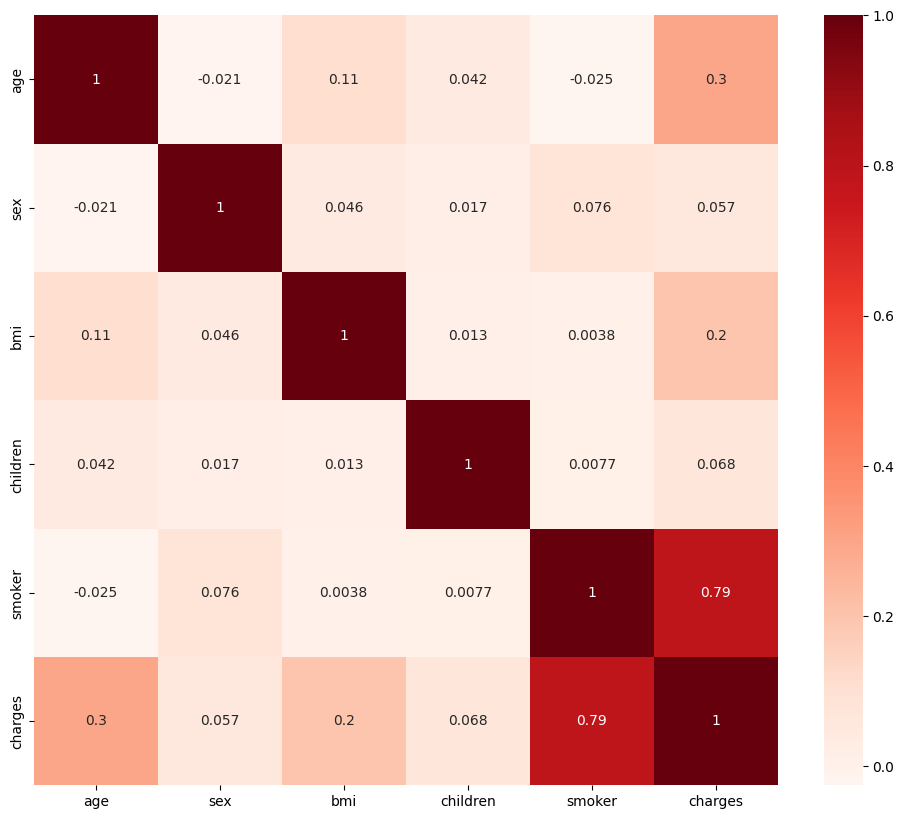

In [7]:
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(12,10))
cor = dfI.corr()
sn.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


In [8]:
dfI.drop(["sex", "children"], axis=1, inplace=True)

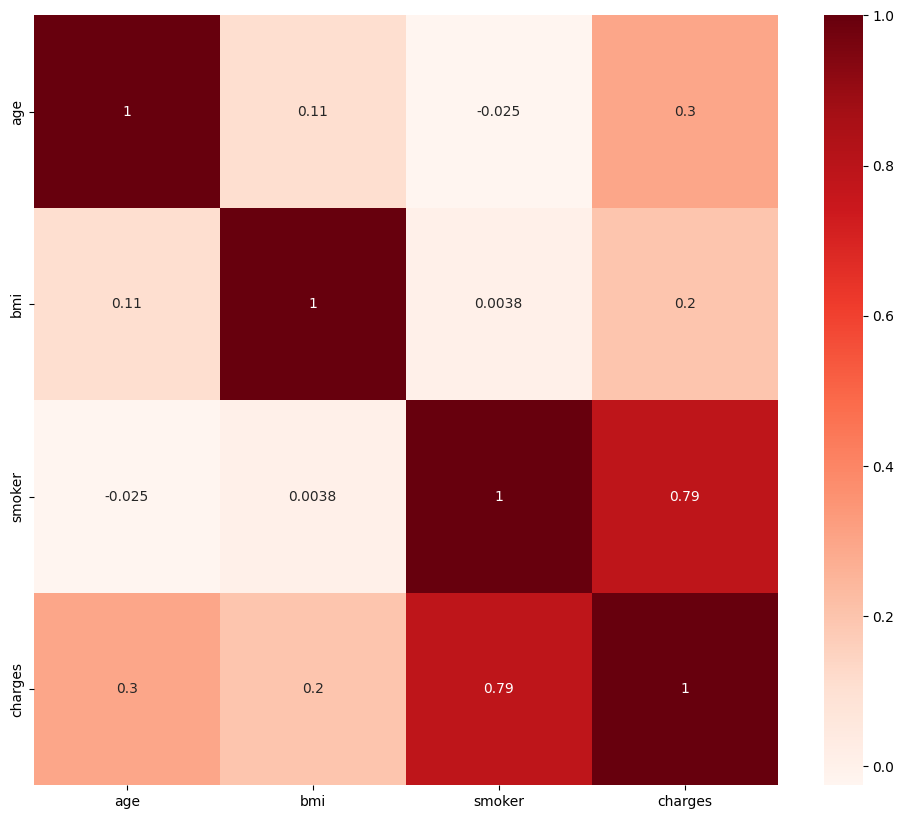

In [9]:
plt.figure(figsize=(12,10))
cor = dfI.corr()
sn.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

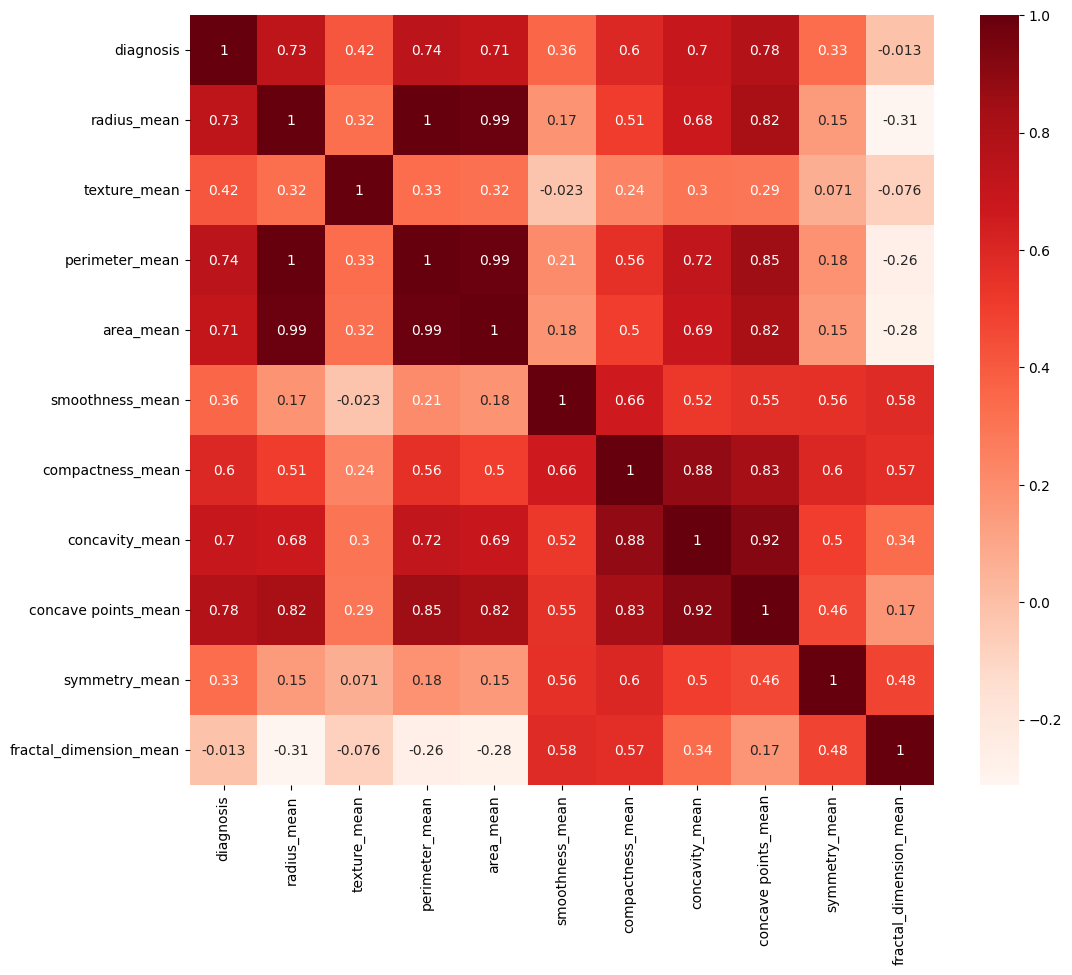

In [10]:
plt.figure(figsize=(12,10))
cor = dfW.corr()
sn.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [11]:
dfW.drop(["symmetry_mean", "fractal_dimension_mean"], axis=1, inplace=True)

**Clustering**

In [12]:
from sklearn.cluster import KMeans

clusters = KMeans(n_clusters=5, tol=0.01, random_state=0).fit_predict(X)

dfI["clusters"] = clusters.tolist()

C:\Users\angel\anaconda3\envs\pml\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


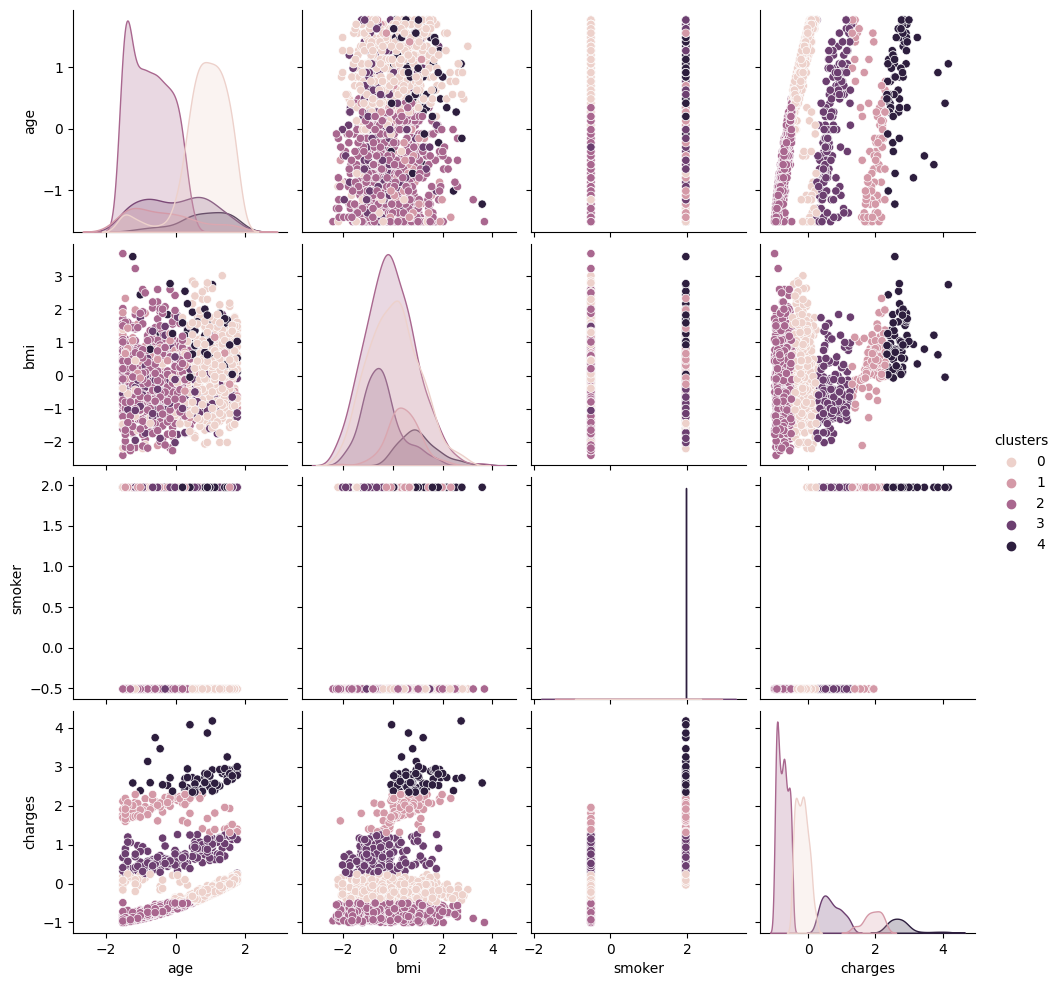

In [13]:
sn.pairplot(dfI, hue="clusters")

In [14]:
distortions = []
spread = range(1, 20)

for k in spread:
    model = KMeans(n_clusters=k, tol=0.01, random_state=0)
    model.fit(X)
    distortions.append(model.inertia_)

C:\Users\angel\anaconda3\envs\pml\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\angel\anaconda3\envs\pml\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\angel\anaconda3\envs\pml\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\angel\anaconda3\envs\pml\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is k

[196074537709.51968, 48015231731.463974, 23045257993.283226, 12127383296.13954, 8549689362.499795, 6168177017.146052, 4453426593.680675, 3495499177.4059377, 2809288409.680807, 2302256678.0432167, 1868014741.9086003, 1512746129.9802117, 1335112823.2860515, 1111763349.4996083, 933762270.0174414, 851900341.9208056, 764227541.8186705, 681585808.7836576, 634053912.3209697]


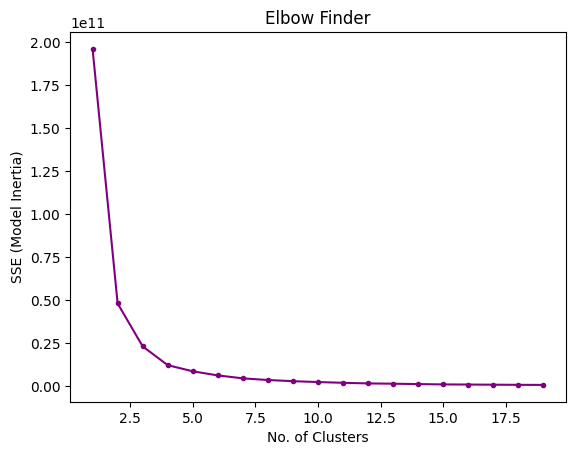

In [15]:
import matplotlib.pyplot as plt

plt.plot(spread, distortions, marker = ".", c="purple")
plt.title("Elbow Finder")
plt.xlabel("No. of Clusters")
plt.ylabel("SSE (Model Inertia)")
plt.show()

In [16]:
clusters = KMeans(n_clusters=3, tol=0.01, random_state=0).fit_predict(X)

C:\Users\angel\anaconda3\envs\pml\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


In [17]:
dfI["clusters_optimized"] = clusters.tolist()

**Mean-Shift clustering**

In [23]:
from sklearn.cluster import MeanShift

mean_shift= MeanShift(bandwidth = 0.7)
mean_shift.fit(X)

ms_clusters = mean_shift.predict(X)
